In [1]:
import dataset
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
from matplotlib import pyplot as plt
from albumentations import *
from albumentations.pytorch import ToTensor
from main import Model
%matplotlib inline
path = "/home/gianscarpe/dev/data/dhp19/time_count_dataset/movements_per_frame/"

In [4]:
model_path = '/home/gianscarpe/dev/exps/exp21/version_1/checkpoints/epoch=9.ckpt'
net = Model.load_from_checkpoint(model_path)

/home/gianscarpe/anaconda3/envs/event-camera/lib/python3.7/site-packages/pytorch_lightning/core/lightning.py:1374: UserWarning: Checkpoint does not contain hyperparameters but Model's __init__ contains argument 'hparams'. Will pass in an empty Namespace instead. Did you forget to store your model hyperparameters in self.hparams?
  f"Checkpoint does not contain hyperparameters but {cls.__name__}'s __init__ "


AttributeError: 'Namespace' object has no attribute 'num_workers'

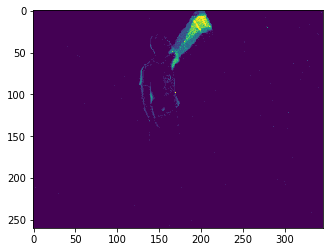

In [19]:
# Indexes
from utils.generate_indexes import load_npy_indexes_and_map
file_paths, train_index, val_index, test_index = load_npy_indexes_and_map(path)

In [18]:
transform_val = Compose([
             Resize(224, 224),
             ToTensor()
       ])

In [23]:

d = dataset.get_dataset(file_paths, index=train_index, preload=False, n_channels=1, preprocess=transform_val)
#from https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/2
loader = DataLoader(
    d,
    batch_size=32,
    num_workers=1,
    shuffle=False
)

0.0

In [ ]:
it = iter(loader)
b_x, b_y = next(it)
trans = transforms.ToPILImage()
for img, label in zip(b_x, b_y):
    img = trans(img)
    plt.figure()
    plt.imshow(img)